# Can We Predict Left-Handedness from Psychological Factors?

![A left-hand with 'I'm a lefty' written on it](https://imgur.com/BhrAgSx.jpg)

Well, we're going to use a survey of psychological factors to see if we can!

In the context of the left-handedness and personality, what are three specific and conclusively answerable problems that you could answer using data science? 

- As one's response to Q1 increases, are people more or less likely to be left-handed?
- Does the distribution of handedness vary based one's response to Q1?
- Which question (Q1-Q44) has the highest association with left-handedness?

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))#to expand the size of my container so it can take fill up my entire monitor

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina' #to enable higher quality plots on retina displays
pd.options.display.max_rows = 200 #increasing maximum viewable rows and columns
pd.options.display.max_columns = 200

# Let's read in our data

In [6]:
lefty = pd.read_csv('data.csv', sep='\t')

In [7]:
lefty.head(2)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,1,1,5,5,5,1,5,1,5,1,5,1,1,1,5,5,5,1,5,1,1,1,1,5,5,1,1,1,5,5,5,1,5,1,91,232,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,2,5,3,4,1,4,1,1,1,5,2,4,4,4,1,2,1,2,1,3,1,5,2,4,4,4,4,4,1,3,1,4,4,5,17,247,CA,2,1,14,1,2,2,6,1,1


# If we were actually conducting a survey to gather this data ourselves, from an ethics/privacy point of view, what are some things we might consider when attempting to gather this data?

1. Is it necessary?
2. How can we ensure the providers of the data remain anonymous?
3. How can we ensure all sexual orenitations or gender identities are represented in a way that adequately reflects their proportionality in the general population? 

# EDA

In [254]:
lefty.shape

(4184, 56)

In [255]:
lefty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

In [256]:
lefty.isnull().sum().sort_values(ascending=False)

Q1             0
Q2             0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q42            0
Q43            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
religion       0
Q30            0
Q29            0
Q28            0
Q14            0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q15            0
Q27            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
hand           0
dtype: int64

In [257]:
lefty.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,2.748805,2.852772,2.657505,3.334130,3.168021,2.930210,2.564771,3.424952,2.928537,3.639818,2.867591,3.595124,3.861138,3.337237,1.999761,3.001434,2.730641,2.624044,2.543738,2.894359,3.002151,2.869503,2.741874,3.022228,3.074092,2.610660,3.465344,2.798757,2.569312,2.984226,3.385277,2.704828,2.676386,2.736616,347.808556,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,1.443078,1.556284,1.559575,1.522866,1.501683,1.575544,1.619010,1.413236,1.493122,1.414569,1.360858,1.354475,1.291425,1.426095,1.290747,1.480610,1.485883,1.481709,1.611428,1.477968,1.420032,1.659141,1.405670,1.562694,1.546400,1.409707,1.521460,1.413584,1.621772,1.483752,1.423055,1.544345,1.523097,1.471845,5908.901681,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,6.000000,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,12.000000,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,35.000000,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00

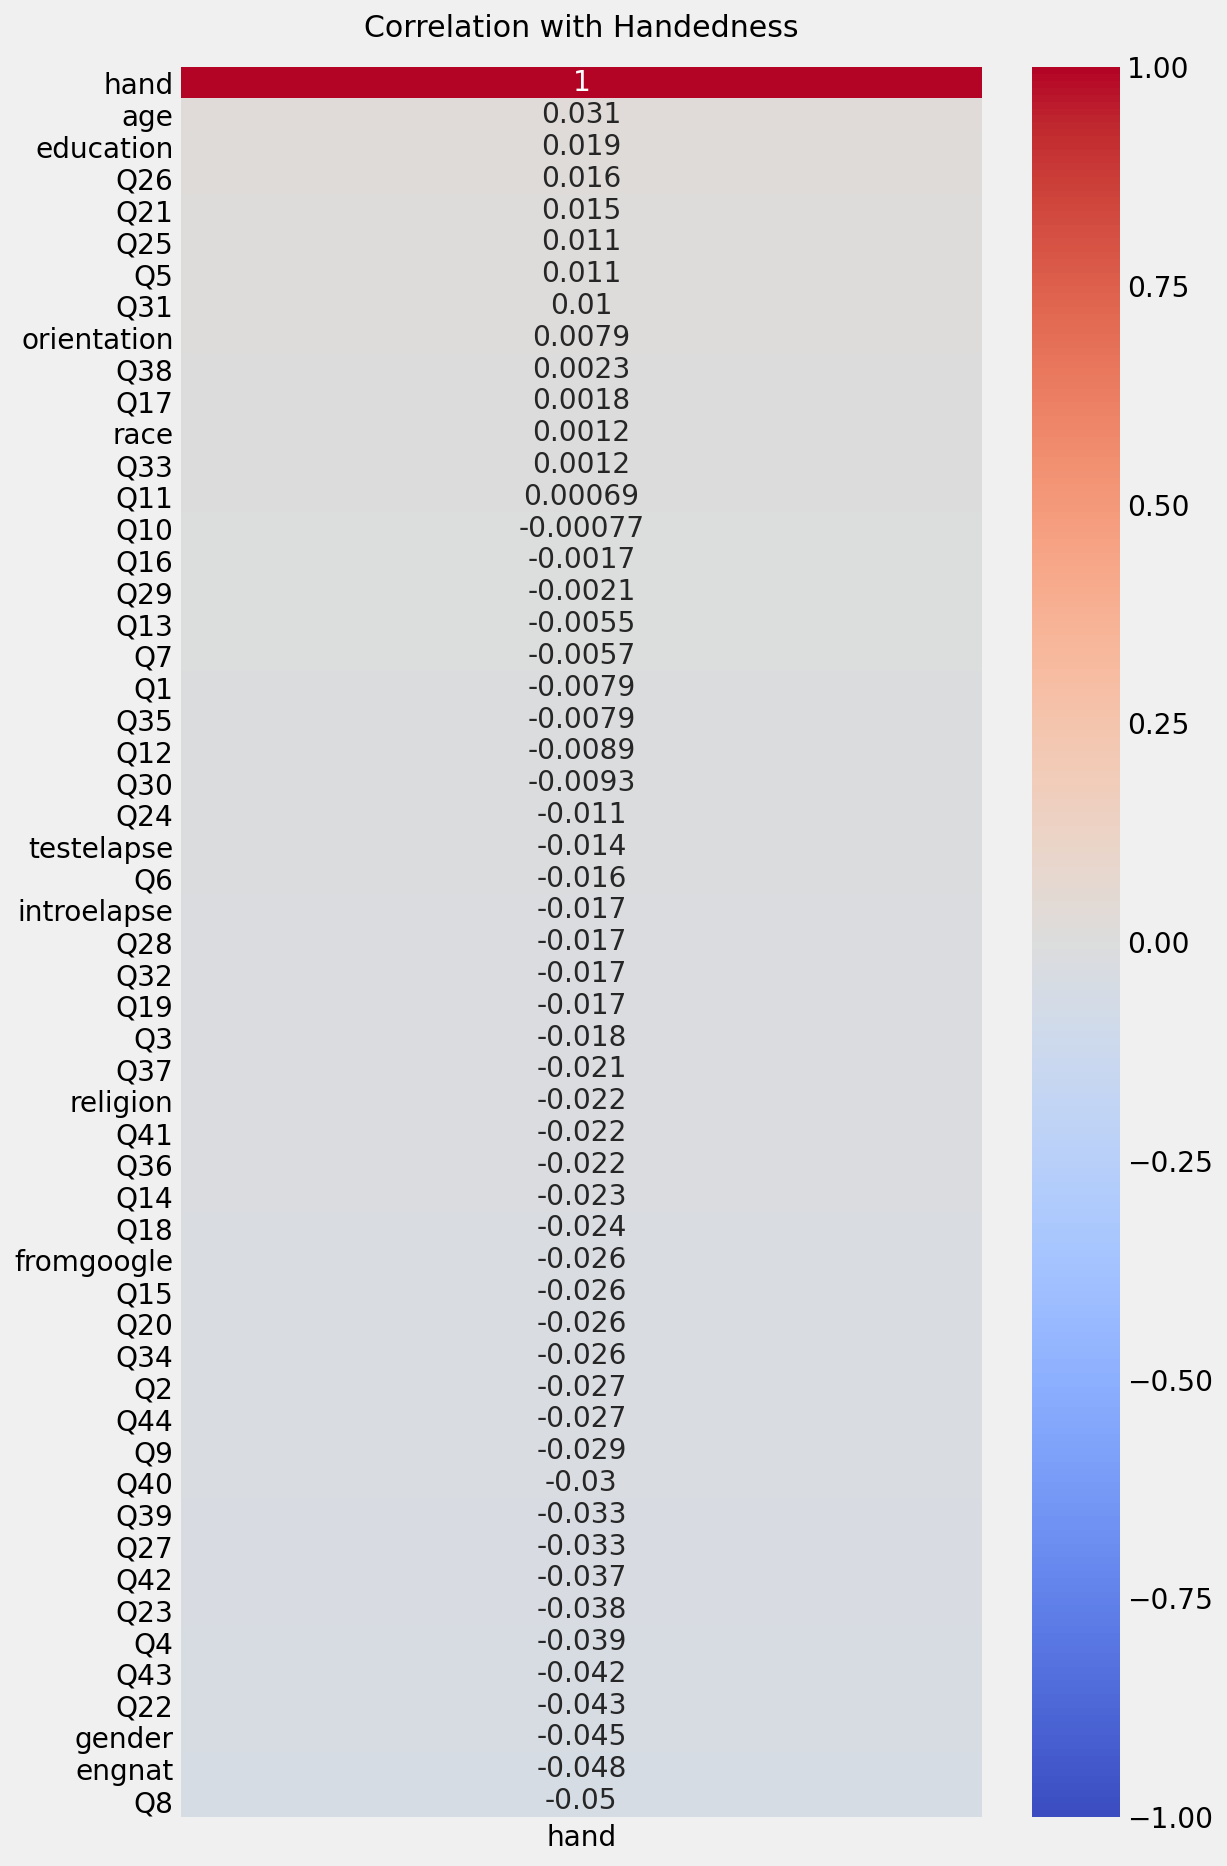

In [306]:
plt.figure(figsize=(8, 15))
heatmap = sns.heatmap(lefty.corr()[['hand']].sort_values(by='hand', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation with Handedness', fontdict={'fontsize':15}, pad=15);

# Since we want to predict handedness, this is a classification, not a regressions problem (the output is discrete).

# While it's often a good idea to standardize our variables when using KNN, we won't here.

Since we're only using Q1-Q44 as predictors, we don't need to because they're already on the same scale (1 to 5). 

We want the interpretability of a one-unit increase in the response to an individual question.

# But first, we need to do some cleaning.

Whether a person is left-handed is a yes or no question, but hand currently has 4 values instead of 2. 

According to the codebook, 1=Right, 2=Left, 3=Both.

I'm going to mape 1 on left and 0 for right and both. Before doing that however, I will drop every observation that has 0 listed for hand since those are missing values.

In [259]:
lefty['hand'].unique()

array([3, 1, 2, 0])

In [260]:
lefty['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [261]:
lefty['hand'].shape

(4184,)

In [262]:
lefty.drop(lefty[lefty.hand == 0].index, inplace=True)

In [263]:
lefty['hand'].shape

(4173,)

In [264]:
lefty['hand'].unique()

array([3, 1, 2])

In [265]:
lefty['hand'] = lefty['hand'].map({1 : 0, 2 : 1, 3 : 0})

In [266]:
lefty['hand'].unique()

array([0, 1])

In [267]:
lefty['hand'].value_counts()

0    3721
1     452
Name: hand, dtype: int64

# Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

- We'll four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

In [268]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [269]:
X = lefty.drop(columns=['introelapse', 'testelapse', 'country',
                        'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
                        'race', 'religion', 'hand'], axis = 1)
y = lefty['hand']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [271]:
pipe_knn_3 = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)), 
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

In [272]:
cross_val_score(pipe_knn_3, X_train, y_train, cv = 5).mean()

0.8529069297686485

In [273]:
pipe_knn_3.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [274]:
pipe_knn_3.score(X_train, y_train)

0.9038346315158777

In [275]:
pipe_knn_3.score(X_test, y_test)

0.8634730538922155

In [276]:
pipe_knn_5 = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)), 
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [277]:
cross_val_score(pipe_knn_5, X_train, y_train, cv = 5).mean()

0.876272342870481

In [278]:
pipe_knn_5.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('knn', KNeighborsClassifier())])

In [279]:
pipe_knn_5.score(X_train, y_train)

0.890653085680048

In [280]:
pipe_knn_5.score(X_test, y_test)

0.8838323353293414

In [281]:
pipe_knn_15 = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)), 
    ('knn', KNeighborsClassifier(n_neighbors=15))
])

In [282]:
cross_val_score(pipe_knn_15, X_train, y_train, cv = 5).mean()

0.8900542243848136

In [283]:
pipe_knn_15.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('knn', KNeighborsClassifier(n_neighbors=15))])

In [284]:
pipe_knn_15.score(X_train, y_train)

0.889754343918514

In [285]:
pipe_knn_15.score(X_test, y_test)

0.8982035928143712

In [286]:
pipe_knn_25 = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)), 
    ('knn', KNeighborsClassifier(n_neighbors=25))
])

In [287]:
cross_val_score(pipe_knn_25, X_train, y_train, cv = 5).mean()

0.8900542243848136

In [288]:
pipe_knn_25.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('knn', KNeighborsClassifier(n_neighbors=25))])

In [289]:
pipe_knn_25.score(X_train, y_train)

0.890053924505692

In [290]:
pipe_knn_25.score(X_test, y_test)

0.8982035928143712

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 14. Let's use logistic regression to predict whether or not the person is left-handed.

- We'll create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. 

In [291]:
from sklearn.linear_model import LogisticRegression

In [292]:
lasso_1 = LogisticRegression(C = 1.0)
lasso_1.fit(X_train, y_train)

LogisticRegression()

In [293]:
print(f'Training Score: {lasso_1.score(X_train, y_train)}')
print(f'Testing Score: {lasso_1.score(X_test, y_test)}')

Training Score: 0.890053924505692
Testing Score: 0.8982035928143712


In [294]:
lasso_10 = LogisticRegression(C = 0.1)
lasso_10.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [295]:
print(f'Training Score: {lasso_10.score(X_train, y_train)}')
print(f'Testing Score: {lasso_10.score(X_test, y_test)}')

Training Score: 0.890053924505692
Testing Score: 0.8982035928143712


In [296]:
ridge_1 = LogisticRegression(penalty = 'l2', C = 1.0)
ridge_1.fit(X_train, y_train)

LogisticRegression()

In [297]:
print(f'Training Score: {ridge_1.score(X_train, y_train)}')
print(f'Testing Score: {ridge_1.score(X_test, y_test)}')

Training Score: 0.890053924505692
Testing Score: 0.8982035928143712


In [298]:
ridge_10 = LogisticRegression(penalty = 'l2', C = 0.1)
ridge_10.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [299]:
print(f'Training Score: {ridge_10.score(X_train, y_train)}')
print(f'Testing Score: {ridge_10.score(X_test, y_test)}')

Training Score: 0.890053924505692
Testing Score: 0.8982035928143712


# Let's evaluate our models!

We'll evaulate all eight of them using accuracy as our metric.

In [300]:
print(f'KNN Training Score with K = 3 : {pipe_knn_3.score(X_train, y_train)}')
print(f'KNN Testing Score with K = 3 : {pipe_knn_3.score(X_test, y_test)}')

print(f'KNN Training Score with K = 5: {pipe_knn_5.score(X_train, y_train)}')
print(f'KNN Testing Score with K = 5: {pipe_knn_5.score(X_test, y_test)}')

print(f'KNN Training Score with K = 15: {pipe_knn_15.score(X_train, y_train)}')
print(f'KNN Testing Score with K = 15: {pipe_knn_15.score(X_test, y_test)}')

print(f'KNN Training Score with K = 25: {pipe_knn_25.score(X_train, y_train)}')
print(f'KNN Testing Score with K = 25: {pipe_knn_25.score(X_test, y_test)}')

print(f'Logistic Regression Training Score with LASSO penalty and alpha = 1: {lasso_1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score with LASSO penalty and alpha = 1: {lasso_1.score(X_test, y_test)}')

print(f'Logistic Regression Training Score with LASSO penalty and alpha = 10: {lasso_10.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score with LASSO penalty and alpha = 10: {lasso_10.score(X_test, y_test)}')

print(f'Logistic Regression Training Score with Ridge penalty and alpha = 1: {ridge_1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score with Ridge penalty and alpha = 1: {ridge_1.score(X_test, y_test)}')

print(f'Logistic Regression Training Score with Ridge penalty and alpha = 10: {ridge_10.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score with Ridge penalty and alpha = 10: {ridge_10.score(X_test, y_test)}')

KNN Training Score with K = 3 : 0.9038346315158777
KNN Testing Score with K = 3 : 0.8634730538922155
KNN Training Score with K = 5: 0.890653085680048
KNN Testing Score with K = 5: 0.8838323353293414
KNN Training Score with K = 15: 0.889754343918514
KNN Testing Score with K = 15: 0.8982035928143712
KNN Training Score with K = 25: 0.890053924505692
KNN Testing Score with K = 25: 0.8982035928143712
Logistic Regression Training Score with LASSO penalty and alpha = 1: 0.890053924505692
Logistic Regression Testing Score with LASSO penalty and alpha = 1: 0.8982035928143712
Logistic Regression Training Score with LASSO penalty and alpha = 10: 0.890053924505692
Logistic Regression Testing Score with LASSO penalty and alpha = 10: 0.8982035928143712
Logistic Regression Training Score with Ridge penalty and alpha = 1: 0.890053924505692
Logistic Regression Testing Score with Ridge penalty and alpha = 1: 0.8982035928143712
Logistic Regression Training Score with Ridge penalty and alpha = 10: 0.89005

We can see that are models are overfit for $k = 3$ and $k = 5$ because the training scores are higher than the testing scores. 

What we also see is that: 
- As $k$ increases, our bias increases and our variance decreases.
- As $k$ decreases, our bias decreases and our variance increases.

> There's a helpful visualization that demonstrates that [here](http://scott.fortmann-roe.com/docs/BiasVariance.html).

# What can we do for a KNN model if it's overfit?

1. Increase K to decrease variance.

2. Simplifying our model by using less questions.

3. Use a different model.

# In regards to our logistical regression models...

We can see there's no overfitting because our training scores are less than our test scores.

If they were overfit though we could:
1. Reduce the number of variables.
2. Increase regularization strength.
3. Get better data.

# As for the bias-variance tradeoff with log reg:

- $C$ is the the inverse of regularization strength in Logistic Regression.

- As $C$  increases, there's less regularization, meaning variance increases while bias decreases and vice versa.

# With respect to our models, either regularization has no effect or it has such a big effect that it cancels out the variables. This likely means that the variables we're using are essentially useless.

# If we wanted to understand which psychological features are most important in determining left-handedness, of the two types of models we used, we'd probably lean towards logistic regression.

A logistic regression model would allow us to understand the effect of psychological features on left-handedness. 

Specifically, we can estimate coefficients that tell us the impact of a one-unit change in psychological factors on whether or not people are left-handed. 

$K$-nearest neighbors does not provide us with a similar way to understaand how individual features affect left-handedness.

# Case in point:

In [305]:
lasso_10.coef_

array([[-0.06421386, -0.02060742,  0.00444628, -0.05209546,  0.0627217 ,
        -0.00692477,  0.01826786, -0.15702048, -0.04669025,  0.04181673,
         0.01843316,  0.0043401 , -0.06040932, -0.00401882, -0.03606262,
         0.05252417,  0.04481475, -0.01822204, -0.05226153, -0.04108601,
        -0.04004829, -0.08371763, -0.05702724,  0.00673017,  0.04419278,
         0.07871443,  0.07578701,  0.019684  ,  0.04566003,  0.03049151,
         0.05846479, -0.01687587, -0.01412198, -0.01361486,  0.02832475,
        -0.02973448, -0.02165608,  0.08120201, -0.05444295, -0.07177668,
        -0.05012084, -0.03360265, -0.14776591, -0.04054722]])

Here we see:
- as Q1 increases by 1, a person is 6.4% less likely to be left-handed.
- as Q2 increases by 1, a person is 2.1% less likely to be left-handed.
- as Q3 increases by 1, a person is 0.0% less likely to be left-handed.